In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
#Create an engine to a postgressql datbase file
engine = create_engine('postgresql+psycopg2://angieyi:@localhost/donorschooseapi')

In [8]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
Projects = Base.classes.projects
session = Session(engine)

In [9]:
Projects.__table__

Table('projects', MetaData(bind=None), Column('id', INTEGER(), table=<projects>, primary_key=True, nullable=False, server_default=DefaultClause(<sqlalchemy.sql.elements.TextClause object at 0x11cfab2e8>, for_update=False)), Column('cityname', VARCHAR(), table=<projects>), Column('costtocomplete', INTEGER(), table=<projects>), Column('low_poverty', INTEGER(), table=<projects>), Column('moderatelow_poverty', INTEGER(), table=<projects>), Column('moderate_poverty', INTEGER(), table=<projects>), Column('moderatehigh_poverty', INTEGER(), table=<projects>), Column('high_poverty', INTEGER(), table=<projects>), Column('highest_poverty', INTEGER(), table=<projects>), Column('unknown_poverty', INTEGER(), table=<projects>), Column('avg_household_salary', DOUBLE_PRECISION(precision=53), table=<projects>), schema=None)

In [10]:
costtocomplete_city = session.query(Projects.cityname, Projects.costtocomplete).\
    filter(Projects.costtocomplete > 0).order_by(Projects.costtocomplete).all()

In [11]:
project_cities = [str(result[0]) for result in costtocomplete_city]
project_totalcost = [int(result[1]) for result in costtocomplete_city]

In [12]:
print(project_cities)

['Cupertino', 'Cupertino', 'Cupertino', 'Cupertino', 'Cupertino', 'Orinda', 'Orinda', 'Orinda', 'Orinda', 'Orinda', 'Rohnert Park', 'Rohnert Park', 'Rohnert Park', 'Rohnert Park', 'Rohnert Park', 'Los Altos', 'Los Altos', 'Los Altos', 'Los Altos', 'Los Altos', 'Saratoga', 'Saratoga', 'Saratoga', 'Saratoga', 'Saratoga', 'Fairfax', 'Fairfax', 'Fairfax', 'Fairfax', 'Fairfax', 'Sausalito', 'Sausalito', 'Sausalito', 'Sausalito', 'Sausalito', 'Sebastopol', 'Sebastopol', 'Sebastopol', 'Sebastopol', 'Sebastopol', 'South San Francisco', 'South San Francisco', 'South San Francisco', 'South San Francisco', 'South San Francisco', 'Vacaville', 'Vacaville', 'Vacaville', 'Vacaville', 'Vacaville', 'Emeryville', 'Emeryville', 'Emeryville', 'Emeryville', 'Emeryville', 'Rio Vista', 'Rio Vista', 'Rio Vista', 'Rio Vista', 'Rio Vista', 'Burlingame', 'Burlingame', 'Burlingame', 'Burlingame', 'Burlingame', 'Dixon', 'Dixon', 'Dixon', 'Dixon', 'Dixon', 'Petaluma', 'Petaluma', 'Petaluma', 'Petaluma', 'Petaluma',

In [13]:
print(project_totalcost)

[100, 100, 100, 100, 100, 127, 127, 127, 127, 127, 173, 173, 173, 173, 173, 233, 233, 233, 233, 233, 366, 366, 366, 366, 366, 455, 455, 455, 455, 455, 573, 573, 573, 573, 573, 622, 622, 622, 622, 622, 873, 873, 873, 873, 873, 910, 910, 910, 910, 910, 995, 995, 995, 995, 995, 1047, 1047, 1047, 1047, 1047, 1083, 1083, 1083, 1083, 1083, 1096, 1096, 1096, 1096, 1096, 1135, 1135, 1135, 1135, 1135, 1305, 1305, 1305, 1305, 1305, 1449, 1449, 1449, 1449, 1449, 1463, 1463, 1463, 1463, 1463, 2021, 2021, 2021, 2021, 2021, 2070, 2070, 2070, 2070, 2070, 2628, 2628, 2628, 2628, 2628, 3385, 3385, 3385, 3385, 3385, 3488, 3488, 3488, 3488, 3488, 3554, 3554, 3554, 3554, 3554, 3788, 3788, 3788, 3788, 3788, 4952, 4952, 4952, 4952, 4952, 4967, 4967, 4967, 4967, 4967, 5267, 5267, 5267, 5267, 5267, 5431, 5431, 5431, 5431, 5431, 5438, 5438, 5438, 5438, 5438, 5865, 5865, 5865, 5865, 5865, 6750, 6750, 6750, 6750, 6750, 7151, 7151, 7151, 7151, 7151, 7330, 7330, 7330, 7330, 7330, 8267, 8267, 8267, 8267, 8267, 9406

In [14]:
lowpoverty_cities = session.query(Projects.cityname, Projects.low_poverty, Projects.moderatelow_poverty).\
    filter(Projects.low_poverty >= 0, Projects.moderatelow_poverty >= 0).order_by(Projects.low_poverty).all()

In [15]:
print(lowpoverty_cities)

[('Yountville', 0, 0), ('Oakland', 0, 1), ('Oakley', 0, 10), ('Palo Alto', 0, 0), ('Petaluma', 0, 0), ('Pinole', 0, 2), ('Pittsburg', 0, 0), ('Portola Valley', 0, 0), ('Redwood City', 0, 1), ('Rio Vista', 0, 2), ('Rohnert Park', 0, 0), ('Ross', 0, 0), ('San Anselmo', 0, 0), ('San Bruno', 0, 2), ('San Francisco', 0, 2), ('San Leandro', 0, 3), ('San Mateo', 0, 5), ('San Pablo', 0, 0), ('Sausalito', 0, 0), ('Sonoma', 0, 0), ('St. Helena', 0, 0), ('Suisun City', 0, 0), ('Tiburon', 0, 0), ('Vacaville', 0, 1), ('Windsor', 0, 0), ('Woodside', 0, 0), ('Yountville', 0, 0), ('American Canyon', 0, 0), ('Antioch', 0, 0), ('Atherton', 0, 0), ('Belvedere', 0, 0), ('Berkeley', 0, 22), ('Brisbane', 0, 0), ('Calistoga', 0, 0), ('Campbell', 0, 0), ('Cloverdale', 0, 0), ('Colma', 0, 0), ('Corte Madera', 0, 0), ('Cotati', 0, 0), ('Dixon', 0, 1), ('East Palo Alto', 0, 0), ('Emeryville', 0, 0), ('Fairfield', 0, 16), ('Foster City', 0, 0), ('Gilroy', 0, 3), ('Half Moon Bay', 0, 0), ('Hayward', 0, 1), ('Heald

In [16]:
highpoverty_to_household = session.query(Projects.cityname, Projects.high_poverty, Projects.highest_poverty, Projects.moderatehigh_poverty, Projects.avg_household_salary).\
    filter(Projects.high_poverty > 0, Projects.highest_poverty > 0, Projects.moderatehigh_poverty > 0).order_by(Projects.avg_household_salary).all()

In [17]:
highpoverty_cities = [str(result[0]) for result in highpoverty_to_household]
highpoverty_projects = [int(result[1]) for result in highpoverty_to_household]
highestpoverty_projects = [int(result[2]) for result in highpoverty_to_household]
moderatehighpoverty_projects = [int(result[3]) for result in highpoverty_to_household]
highestpoverty_avgsalary = [int(result[4]) for result in highpoverty_to_household]

In [18]:
highpoverty_vs_householdsalary = pd.DataFrame(
    {
       'city': highpoverty_cities,
       'high poverty': highpoverty_projects,
       'highest poverty': highestpoverty_projects,
       'moderate high poverty': moderatehighpoverty_projects,
       'household salary average': highestpoverty_avgsalary
        
    }
, index=None) 

highpoverty_vs_householdsalary.drop_duplicates()

,city,high poverty,highest poverty,household salary average,moderate high poverty
0,San Pablo,3,19,42746,2
5,Oakland,15,25,52962,7
10,Richmond,22,17,54857,8
15,Vallejo,3,5,58472,3
20,Santa Rosa,10,7,60758,4
25,San Leandro,2,4,62279,18
30,Antioch,2,8,65770,19
35,Concord,5,13,67122,20
40,San Rafael,7,8,75668,2
45,San Francisco,16,13,78378,11


In [19]:
print(highpoverty_cities)
print(highestpoverty_projects)

['San Pablo', 'San Pablo', 'San Pablo', 'San Pablo', 'San Pablo', 'Oakland', 'Oakland', 'Oakland', 'Oakland', 'Oakland', 'Richmond', 'Richmond', 'Richmond', 'Richmond', 'Richmond', 'Vallejo', 'Vallejo', 'Vallejo', 'Vallejo', 'Vallejo', 'Santa Rosa', 'Santa Rosa', 'Santa Rosa', 'Santa Rosa', 'Santa Rosa', 'San Leandro', 'San Leandro', 'San Leandro', 'San Leandro', 'San Leandro', 'Antioch', 'Antioch', 'Antioch', 'Antioch', 'Antioch', 'Concord', 'Concord', 'Concord', 'Concord', 'Concord', 'San Rafael', 'San Rafael', 'San Rafael', 'San Rafael', 'San Rafael', 'San Francisco', 'San Francisco', 'San Francisco', 'San Francisco', 'San Francisco', 'San Jose', 'San Jose', 'San Jose', 'San Jose', 'San Jose']
[19, 19, 19, 19, 19, 25, 25, 25, 25, 25, 17, 17, 17, 17, 17, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8, 13, 13, 13, 13, 13, 8, 8, 8, 8, 8, 13, 13, 13, 13, 13, 4, 4, 4, 4, 4]


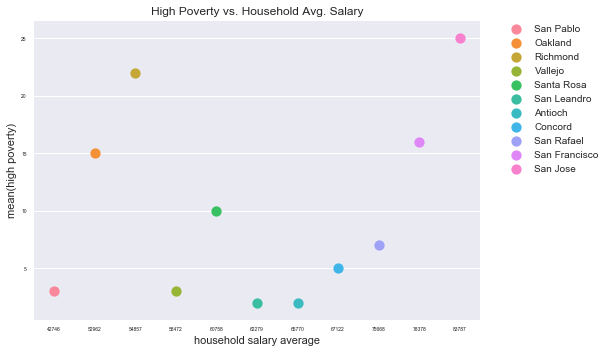

In [20]:
sns.pointplot('household salary average', 'high poverty', 'city', data=highpoverty_vs_householdsalary, fit_reg=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('High Poverty vs. Household Avg. Salary')
plt.tick_params(labelsize=5)
plt.savefig('high_vs_salary')
plt.show()

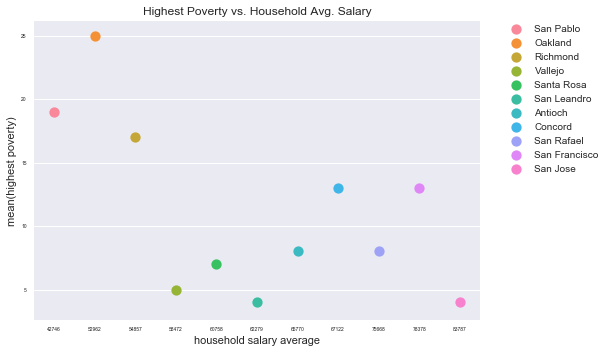

In [21]:
sns.pointplot('household salary average', 'highest poverty', 'city', data=highpoverty_vs_householdsalary, fit_reg=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Highest Poverty vs. Household Avg. Salary')
plt.tick_params(labelsize=5)
plt.savefig('highest_vs_salary')
plt.show()

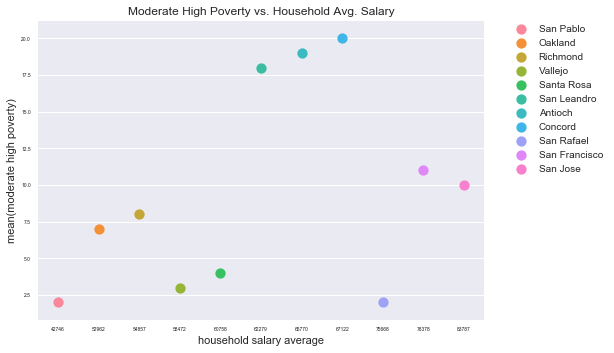

In [22]:
sns.pointplot('household salary average', 'moderate high poverty', 'city', data=highpoverty_vs_householdsalary, fit_reg=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Moderate High Poverty vs. Household Avg. Salary')
plt.tick_params(labelsize=5)
plt.savefig('moderatehigh_vs_salary')
plt.show()

In [23]:
lowpoverty_to_household = session.query(Projects.cityname, Projects.low_poverty, Projects.moderatelow_poverty, Projects.avg_household_salary).\
    filter(Projects.low_poverty > 0, Projects.moderatelow_poverty > 0).order_by(Projects.avg_household_salary).all()

In [24]:
lowpoverty_cities = [str(result[0]) for result in lowpoverty_to_household]
lowpoverty_projects = [int(result[1]) for result in lowpoverty_to_household]
moderatelowpoverty_projects = [int(result[2]) for result in lowpoverty_to_household]
lowpoverty_avgsalary = [int(result[3]) for result in lowpoverty_to_household]

In [25]:
lowpoverty_vs_householdsalary = pd.DataFrame(
    {
       'city': lowpoverty_cities,
       'low poverty': lowpoverty_projects,
       'moderate low poverty': moderatelowpoverty_projects,
       'household salary average': lowpoverty_avgsalary
        
    }
) 

lowpoverty_vs_householdsalary

,city,household salary average,low poverty,moderate low poverty
0,Richmond,54857,1,1
1,Richmond,54857,1,1
2,Richmond,54857,1,1
3,Richmond,54857,1,1
4,Richmond,54857,1,1
5,Concord,67122,7,5
6,Concord,67122,7,5
7,Concord,67122,7,5
8,Concord,67122,7,5
9,Concord,67122,7,5


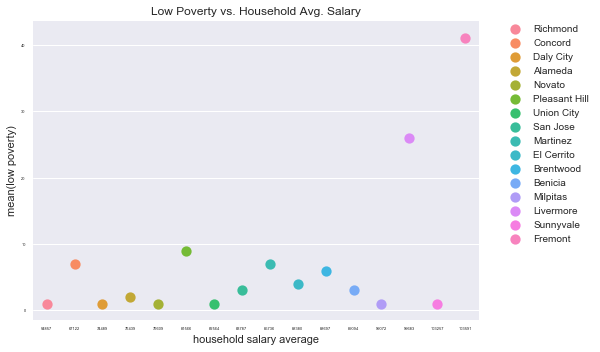

In [26]:
sns.pointplot('household salary average', 'low poverty', 'city', data=lowpoverty_vs_householdsalary, fit_reg=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title('Low Poverty vs. Household Avg. Salary')
plt.tick_params(labelsize=4)
plt.savefig('low_vs_salary')
plt.show()

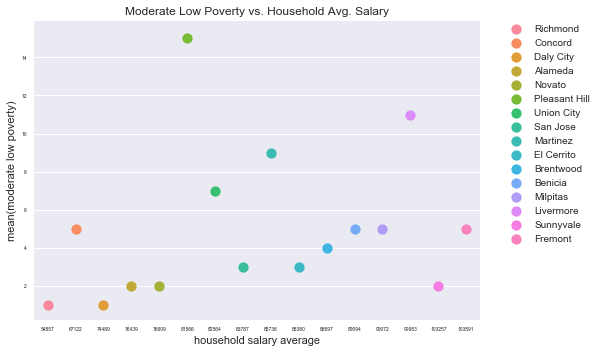

In [27]:
sns.pointplot('household salary average', 'moderate low poverty', 'city', data=lowpoverty_vs_householdsalary, fit_reg=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Moderate Low Poverty vs. Household Avg. Salary')
plt.tick_params(labelsize=5)
plt.savefig('moderatelow_vs_salary')
plt.show()

In [28]:
moderatepoverty_to_household = session.query(Projects.cityname, Projects.moderate_poverty, Projects.avg_household_salary).\
    filter(Projects.moderate_poverty > 0).order_by(Projects.avg_household_salary).all()

In [29]:
moderatepoverty_cities = [str(result[0]) for result in moderatepoverty_to_household]
moderatepoverty_projects = [int(result[1]) for result in moderatepoverty_to_household]
moderatepoverty_avgsalary = [int(result[2]) for result in moderatepoverty_to_household]

In [30]:
moderatepoverty_vs_householdsalary = pd.DataFrame(
    {
       'city': moderatepoverty_cities,
       'moderate poverty': moderatepoverty_projects,
       'household salary average': moderatepoverty_avgsalary
        
    }
)

moderatepoverty_vs_householdsalary

,city,household salary average,moderate poverty
0,Oakland,52962,2
1,Oakland,52962,2
2,Oakland,52962,2
3,Oakland,52962,2
4,Oakland,52962,2
5,Santa Rosa,60758,4
6,Santa Rosa,60758,4
7,Santa Rosa,60758,4
8,Santa Rosa,60758,4
9,Santa Rosa,60758,4


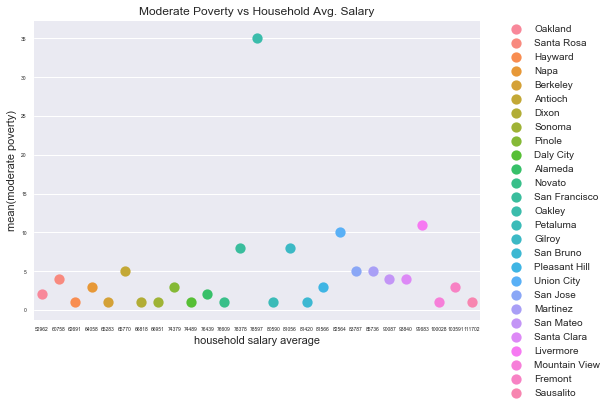

In [31]:
sns.pointplot('household salary average', 'moderate poverty', 'city', data=moderatepoverty_vs_householdsalary, fit_reg=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tick_params(labelsize=5)
plt.title('Moderate Poverty vs Household Avg. Salary')
plt.savefig('moderate_vs_salary')
plt.show()

In [32]:
highestpoverty_cities_only = session.query(Projects.cityname, Projects.highest_poverty).\
    filter(Projects.highest_poverty > 0).order_by(Projects.highest_poverty).all()
    
print(highestpoverty_cities_only)

[('Mountain View', 2), ('Mountain View', 2), ('Mountain View', 2), ('Mountain View', 2), ('Mountain View', 2), ('San Leandro', 4), ('San Leandro', 4), ('San Jose', 4), ('San Jose', 4), ('San Leandro', 4), ('San Leandro', 4), ('San Jose', 4), ('San Leandro', 4), ('San Jose', 4), ('San Jose', 4), ('Vallejo', 5), ('Vallejo', 5), ('Vallejo', 5), ('Vallejo', 5), ('Vallejo', 5), ('Santa Rosa', 7), ('Santa Rosa', 7), ('Santa Rosa', 7), ('Santa Rosa', 7), ('Santa Rosa', 7), ('Antioch', 8), ('San Rafael', 8), ('Antioch', 8), ('San Rafael', 8), ('Antioch', 8), ('San Rafael', 8), ('Antioch', 8), ('San Rafael', 8), ('Antioch', 8), ('San Rafael', 8), ('San Francisco', 13), ('San Francisco', 13), ('Concord', 13), ('San Francisco', 13), ('Concord', 13), ('San Francisco', 13), ('Concord', 13), ('Concord', 13), ('San Francisco', 13), ('Concord', 13), ('Fairfield', 15), ('Fairfield', 15), ('Fairfield', 15), ('Fairfield', 15), ('Fairfield', 15), ('Richmond', 17), ('Richmond', 17), ('Richmond', 17), ('Ric

In [33]:
print([str(result[0]) for result in highestpoverty_cities_only])
print([int(result[1]) for result in highestpoverty_cities_only])

['Mountain View', 'Mountain View', 'Mountain View', 'Mountain View', 'Mountain View', 'San Leandro', 'San Leandro', 'San Jose', 'San Jose', 'San Leandro', 'San Leandro', 'San Jose', 'San Leandro', 'San Jose', 'San Jose', 'Vallejo', 'Vallejo', 'Vallejo', 'Vallejo', 'Vallejo', 'Santa Rosa', 'Santa Rosa', 'Santa Rosa', 'Santa Rosa', 'Santa Rosa', 'Antioch', 'San Rafael', 'Antioch', 'San Rafael', 'Antioch', 'San Rafael', 'Antioch', 'San Rafael', 'Antioch', 'San Rafael', 'San Francisco', 'San Francisco', 'Concord', 'San Francisco', 'Concord', 'San Francisco', 'Concord', 'Concord', 'San Francisco', 'Concord', 'Fairfield', 'Fairfield', 'Fairfield', 'Fairfield', 'Fairfield', 'Richmond', 'Richmond', 'Richmond', 'Richmond', 'Richmond', 'San Pablo', 'San Pablo', 'San Pablo', 'San Pablo', 'San Pablo', 'East Palo Alto', 'East Palo Alto', 'East Palo Alto', 'East Palo Alto', 'East Palo Alto', 'Oakland', 'Oakland', 'Oakland', 'Oakland', 'Oakland', 'Menlo Park', 'Menlo Park', 'Menlo Park', 'Menlo Park'

In [34]:
highpoverty_cities_only = session.query(Projects.cityname, Projects.high_poverty).\
    filter(Projects.high_poverty > 0).order_by(Projects.high_poverty).all()
    
print(highpoverty_cities_only)

[('Napa', 1), ('Petaluma', 1), ('Santa Clara', 1), ('Rohnert Park', 1), ('Rohnert Park', 1), ('Petaluma', 1), ('Napa', 1), ('Santa Clara', 1), ('Suisun City', 1), ('Vacaville', 1), ('Vacaville', 1), ('Gilroy', 1), ('Daly City', 1), ('Gilroy', 1), ('Daly City', 1), ('Napa', 1), ('Petaluma', 1), ('Vacaville', 1), ('Suisun City', 1), ('Santa Clara', 1), ('Rohnert Park', 1), ('Santa Clara', 1), ('Petaluma', 1), ('Rohnert Park', 1), ('Petaluma', 1), ('Rohnert Park', 1), ('Napa', 1), ('Daly City', 1), ('Gilroy', 1), ('Santa Clara', 1), ('Daly City', 1), ('Suisun City', 1), ('Vacaville', 1), ('Gilroy', 1), ('Daly City', 1), ('Gilroy', 1), ('Vacaville', 1), ('Suisun City', 1), ('Napa', 1), ('Suisun City', 1), ('Antioch', 2), ('San Leandro', 2), ('Antioch', 2), ('San Leandro', 2), ('Livermore', 2), ('Livermore', 2), ('San Leandro', 2), ('Antioch', 2), ('Livermore', 2), ('San Leandro', 2), ('San Leandro', 2), ('Antioch', 2), ('Antioch', 2), ('Livermore', 2), ('Livermore', 2), ('San Pablo', 3), (

In [35]:
print([str(result[0]) for result in highpoverty_cities_only])
print([int(result[1]) for result in highpoverty_cities_only])

['Napa', 'Petaluma', 'Santa Clara', 'Rohnert Park', 'Rohnert Park', 'Petaluma', 'Napa', 'Santa Clara', 'Suisun City', 'Vacaville', 'Vacaville', 'Gilroy', 'Daly City', 'Gilroy', 'Daly City', 'Napa', 'Petaluma', 'Vacaville', 'Suisun City', 'Santa Clara', 'Rohnert Park', 'Santa Clara', 'Petaluma', 'Rohnert Park', 'Petaluma', 'Rohnert Park', 'Napa', 'Daly City', 'Gilroy', 'Santa Clara', 'Daly City', 'Suisun City', 'Vacaville', 'Gilroy', 'Daly City', 'Gilroy', 'Vacaville', 'Suisun City', 'Napa', 'Suisun City', 'Antioch', 'San Leandro', 'Antioch', 'San Leandro', 'Livermore', 'Livermore', 'San Leandro', 'Antioch', 'Livermore', 'San Leandro', 'San Leandro', 'Antioch', 'Antioch', 'Livermore', 'Livermore', 'San Pablo', 'Morgan Hill', 'San Pablo', 'Vallejo', 'Morgan Hill', 'San Pablo', 'Vallejo', 'Morgan Hill', 'San Pablo', 'Vallejo', 'Morgan Hill', 'Vallejo', 'Morgan Hill', 'San Pablo', 'Vallejo', 'Pleasant Hill', 'Pleasant Hill', 'Pleasant Hill', 'Pleasant Hill', 'Pleasant Hill', 'Concord', 'Co

In [36]:
costtocomplete_salary = session.query(Projects.avg_household_salary, Projects.costtocomplete).\
   filter(Projects.costtocomplete > 0).order_by(Projects.costtocomplete).all()

In [37]:
costtocomplete_only = [int(result[0]) for result in costtocomplete_salary]
avg_salary = [int(result[1]) for result in costtocomplete_salary]

cost_vs_salary = pd.DataFrame(
    {
       'cost to complete': costtocomplete_only,
       'household salary average': avg_salary
        
    }
) 

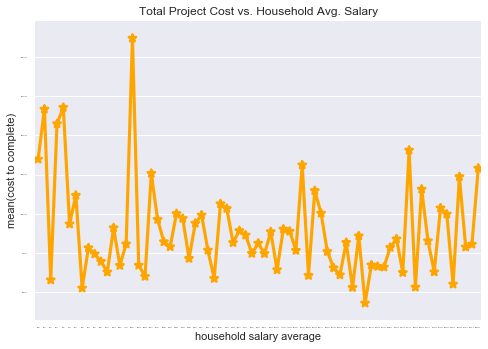

In [54]:
sns.pointplot('household salary average', 'cost to complete', data=cost_vs_salary, fit_reg=False, color='orange', alpha=0.8, markers='*')
plt.tick_params(labelsize=2)
plt.title('Total Project Cost vs. Household Avg. Salary')
plt.savefig('cost_vs_salary')
plt.show()

In [39]:
lowpoverty_cities_only = session.query(Projects.cityname, Projects.low_poverty).\
    filter(Projects.low_poverty > 0).order_by(Projects.low_poverty).all()
    
print(lowpoverty_cities_only)

[('Fairfax', 1), ('Pacifica', 1), ('Orinda', 1), ('Los Altos', 1), ('Novato', 1), ('Milpitas', 1), ('Newark', 1), ('San Rafael', 1), ('Cupertino', 1), ('Daly City', 1), ('San Carlos', 1), ('Richmond', 1), ('Piedmont', 1), ('Fairfax', 1), ('Pacifica', 1), ('Orinda', 1), ('Los Altos', 1), ('Novato', 1), ('Milpitas', 1), ('Newark', 1), ('Newark', 1), ('Novato', 1), ('Orinda', 1), ('Pacifica', 1), ('Piedmont', 1), ('Milpitas', 1), ('Los Altos', 1), ('Richmond', 1), ('San Carlos', 1), ('Fairfax', 1), ('San Rafael', 1), ('Daly City', 1), ('Santa Clara', 1), ('Vallejo', 1), ('Union City', 1), ('Sebastopol', 1), ('South San Francisco', 1), ('Sunnyvale', 1), ('Union City', 1), ('Vallejo', 1), ('Cupertino', 1), ('Sunnyvale', 1), ('Vallejo', 1), ('Union City', 1), ('Sunnyvale', 1), ('South San Francisco', 1), ('Sebastopol', 1), ('Santa Clara', 1), ('San Rafael', 1), ('Cupertino', 1), ('Daly City', 1), ('San Carlos', 1), ('Richmond', 1), ('Piedmont', 1), ('Fairfax', 1), ('Pacifica', 1), ('Orinda',

In [40]:
print([str(result[0]) for result in lowpoverty_cities_only])
print([int(result[1]) for result in lowpoverty_cities_only])

['Fairfax', 'Pacifica', 'Orinda', 'Los Altos', 'Novato', 'Milpitas', 'Newark', 'San Rafael', 'Cupertino', 'Daly City', 'San Carlos', 'Richmond', 'Piedmont', 'Fairfax', 'Pacifica', 'Orinda', 'Los Altos', 'Novato', 'Milpitas', 'Newark', 'Newark', 'Novato', 'Orinda', 'Pacifica', 'Piedmont', 'Milpitas', 'Los Altos', 'Richmond', 'San Carlos', 'Fairfax', 'San Rafael', 'Daly City', 'Santa Clara', 'Vallejo', 'Union City', 'Sebastopol', 'South San Francisco', 'Sunnyvale', 'Union City', 'Vallejo', 'Cupertino', 'Sunnyvale', 'Vallejo', 'Union City', 'Sunnyvale', 'South San Francisco', 'Sebastopol', 'Santa Clara', 'San Rafael', 'Cupertino', 'Daly City', 'San Carlos', 'Richmond', 'Piedmont', 'Fairfax', 'Pacifica', 'Orinda', 'Los Altos', 'Novato', 'Milpitas', 'Newark', 'Newark', 'Novato', 'Orinda', 'Pacifica', 'Piedmont', 'Milpitas', 'Los Altos', 'Richmond', 'San Carlos', 'Fairfax', 'San Rafael', 'Daly City', 'Santa Clara', 'South San Francisco', 'Sebastopol', 'Sebastopol', 'South San Francisco', 'Su

In [41]:
costtocomplete_vs_totalprojects = session.query(Projects.costtocomplete, Projects.totalprojects).\
    filter(Projects.totalprojects > 0).order_by(Projects.costtocomplete).all()

AttributeError: type object 'projects' has no attribute 'totalprojects'